In [125]:
import pandas as pd
import numpy as np

In [126]:
df= pd.read_csv('TravelInsurancePrediction.csv')

In [127]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [129]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [130]:
cat=[]
num=[]

In [131]:
for i in df.columns:
    if df[i].dtype== 'object':
        cat.append(i)
    else:
        num.append(i)

In [132]:
cat

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [133]:
num

['Unnamed: 0',
 'Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'TravelInsurance']

In [134]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

In [135]:
import matplotlib.pyplot as plt

Percentage of outliers in Unnamed: 0 0.0


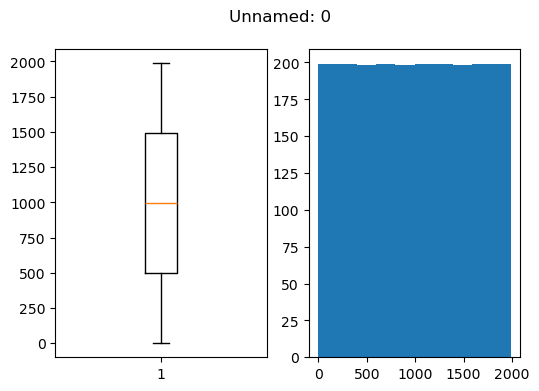

None
+++====+++
Percentage of outliers in Age 0.0


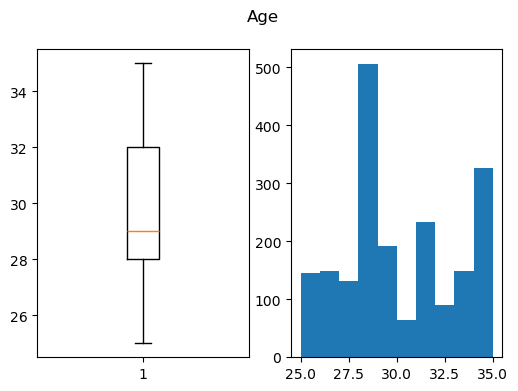

None
+++====+++
Percentage of outliers in AnnualIncome 0.0


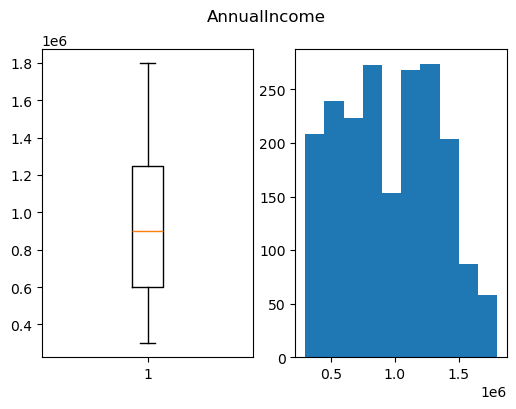

None
+++====+++
Percentage of outliers in FamilyMembers 0.0


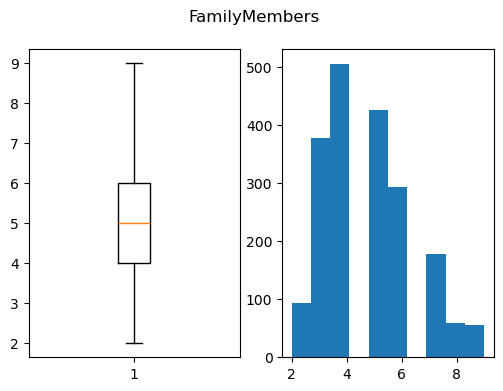

None
+++====+++
Percentage of outliers in ChronicDiseases 0.0


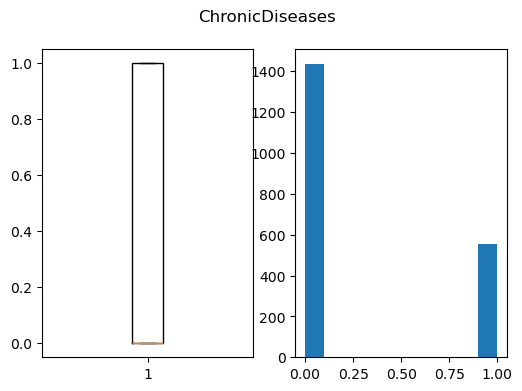

None
+++====+++
Percentage of outliers in TravelInsurance 0.0


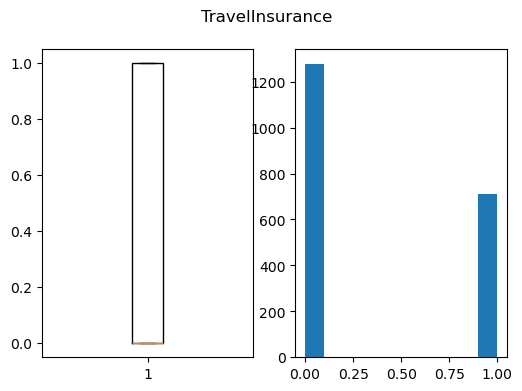

None
+++====+++


In [136]:
for col in num:
    print(outlier_detection_treatment(col))
    print("+++====+++")

In [137]:
cat

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [138]:
import seaborn as sns

def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

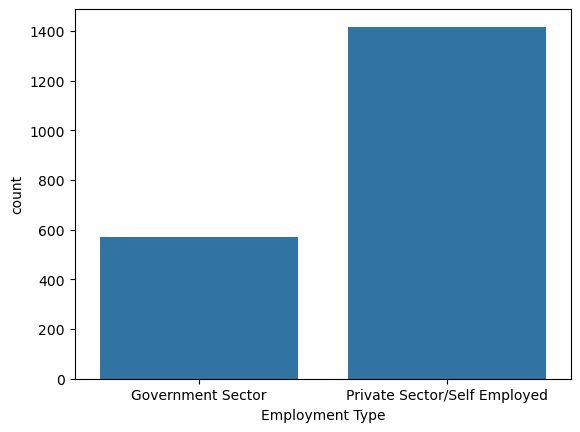

None


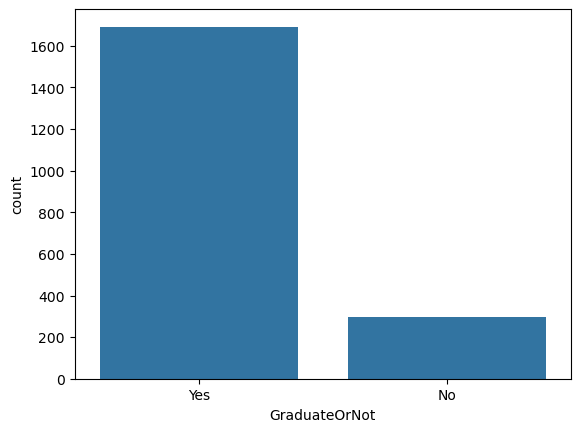

None


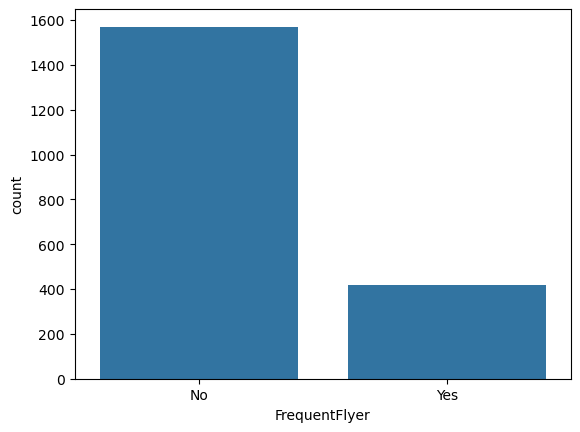

None


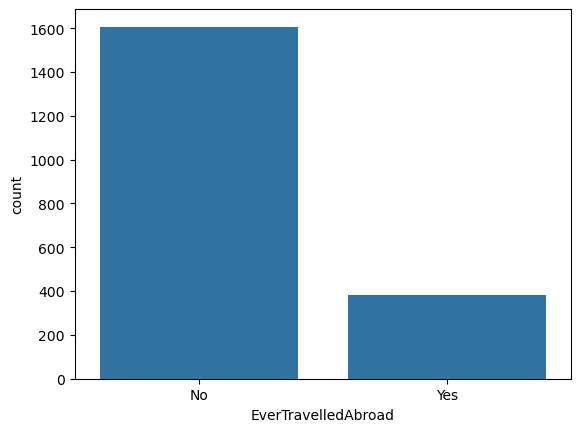

None


In [139]:
for i in cat:
    print(cat_analysis(i))

[Text(0.5, 1.0, 'Correlation Matrix')]

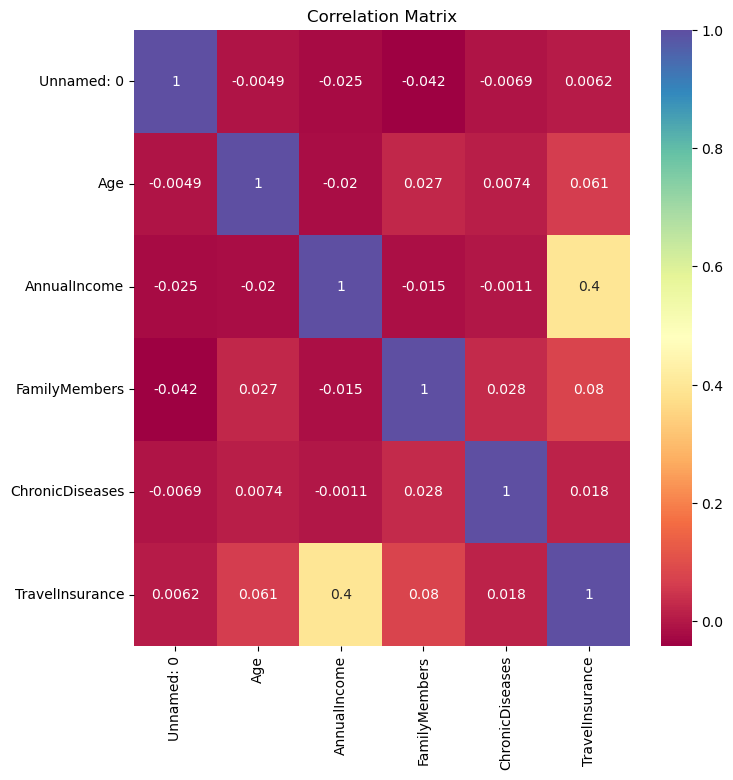

In [140]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title='Correlation Matrix')

In [141]:
df.head()__

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [142]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [143]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [144]:
df.drop('FamilyMembers', axis=1, inplace = True)

In [145]:
cat=[]
for i in df.columns:
    if (df[i].dtype=='object'):
        cat.append(i)
cat

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [146]:
for i in df.columns:
    if (df[i].dtype=='object'):
        print(i, df[i].unique())
        print()
        print()

Employment Type ['Government Sector' 'Private Sector/Self Employed']


GraduateOrNot ['Yes' 'No']


FrequentFlyer ['No' 'Yes']


EverTravelledAbroad ['No' 'Yes']




In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoder

In [149]:
GraduateOrNot= LabelEncoder()
FrequentFlyer= LabelEncoder()
EverTravelledAbroad= LabelEncoder()

In [150]:
df['GraduateOrNot']= GraduateOrNot.fit_transform(df['GraduateOrNot'])

In [151]:
df['FrequentFlyer']= FrequentFlyer.fit_transform(df['FrequentFlyer'])

In [152]:
df['EverTravelledAbroad']= EverTravelledAbroad.fit_transform(df['EverTravelledAbroad'])

# one hot encoder

In [154]:
EmploymentType = OneHotEncoder(sparse_output= False)

In [155]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance'],
      dtype='object')


In [156]:
emp_ohe = EmploymentType.fit_transform(df[['Employment Type']])

In [157]:
df_emp = pd.DataFrame(emp_ohe, columns= EmploymentType.categories_)

In [158]:
df_emp= df_emp.iloc[:,1:]

In [159]:
df_emp

,Private Sector/Self Employed
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1982,1.0
1983,1.0
1984,1.0
1985,1.0


In [160]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,1,1500000,0,1,1,1
1983,1983,28,Private Sector/Self Employed,1,1750000,1,0,1,0
1984,1984,28,Private Sector/Self Employed,1,1150000,1,0,0,0
1985,1985,34,Private Sector/Self Employed,1,1000000,0,1,1,1


In [161]:
X= df.drop(['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'Employment Type'], axis= 1)
y= df['Employment Type']

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       1987 non-null   int64
 1   Age              1987 non-null   int64
 2   AnnualIncome     1987 non-null   int64
 3   ChronicDiseases  1987 non-null   int64
 4   TravelInsurance  1987 non-null   int64
dtypes: int64(5)
memory usage: 77.7 KB


In [163]:
from sklearn.preprocessing import LabelEncoder

grad_encoder = LabelEncoder()
df_grad = pd.DataFrame(grad_encoder.fit_transform(df['GraduateOrNot']).reshape(-1, 1), columns=['GraduateOrNot'])

freq_encoder = LabelEncoder()
df_freq = pd.DataFrame(freq_encoder.fit_transform(df['FrequentFlyer']).reshape(-1, 1), columns=['FrequentFlyer'])

etab_encoder = LabelEncoder()
df_etab = pd.DataFrame(etab_encoder.fit_transform(df['EverTravelledAbroad']).reshape(-1, 1), columns=['EverTravelledAbroad'])

In [164]:
X= pd.concat([X, df_grad, df_freq, df_etab], axis=1)

In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   AnnualIncome         1987 non-null   int64
 3   ChronicDiseases      1987 non-null   int64
 4   TravelInsurance      1987 non-null   int64
 5   GraduateOrNot        1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int64
 7   EverTravelledAbroad  1987 non-null   int64
dtypes: int64(8)
memory usage: 124.3 KB


In [166]:
X= X.values
y= y.values

In [167]:
X.shape

(1987, 8)

In [168]:
y.shape

(1987,)

In [169]:
accuracy = {}

In [170]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state= 0)

In [171]:
X_train.shape

(1390, 8)

In [172]:
y_train.shape

(1390,)

In [173]:
X_test.shape

(597, 8)

In [174]:
y_test.shape

(597,)

# decision tree classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dt= DecisionTreeClassifier(max_depth=10)

In [178]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [179]:
y_pred_train= dt.predict(X_train)

In [180]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [181]:
print(confusion_matrix(y_train, y_pred_train))

[[386  22]
 [  8 974]]


In [182]:
print(accuracy_score(y_train, y_pred_train))

0.9784172661870504


In [183]:
y_pred_test= dt.predict(X_test)

In [184]:
print(confusion_matrix(y_test, y_pred_test))

[[144  18]
 [ 10 425]]


In [185]:
print(accuracy_score(y_test, y_pred_test))

0.9530988274706867


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   int32 
 4   AnnualIncome         1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   int32 
 7   EverTravelledAbroad  1987 non-null   int32 
 8   TravelInsurance      1987 non-null   int64 
dtypes: int32(3), int64(5), object(1)
memory usage: 116.6+ KB


# Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lr= LogisticRegression()

In [190]:
lr.fit(X_train, y_train)

C:\Users\Sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
lr_pred_train= lr.predict(X_train)

In [192]:
print(confusion_matrix(y_train, lr_pred_train))

[[140 268]
 [108 874]]


In [193]:
print(accuracy_score(y_train, lr_pred_train))

0.7294964028776978


In [194]:
lr_pred_test= lr.predict(X_test)

In [195]:
print(accuracy_score(y_test, lr_pred_test))

0.7621440536013401


# random forest

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rf= RandomForestClassifier(max_depth=10)

In [199]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [200]:
rf_train_pred= rf.predict(X_train)

In [201]:
accuracy_score(y_train,rf_train_pred )

0.962589928057554

In [202]:
rf_test_pred= rf.predict(X_test)

In [203]:
accuracy_score(y_test,rf_test_pred )

0.9112227805695142

# voting classidfier

In [205]:
from sklearn.ensemble import VotingClassifier

In [206]:
dtree=  DecisionTreeClassifier(max_depth= 10)
log_reg= LogisticRegression()
rand_for= RandomForestClassifier(max_depth= 10)

In [207]:
est= [('dtree', dtree),
     ('log_reg', log_reg),
     ('rand_for',rand_for )]

In [208]:
vc= VotingClassifier(estimators= est, voting= 'hard')

In [209]:
vc.fit(X_train, y_train)

C:\Users\Sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('dtree', DecisionTreeClassifier(max_depth=10)),
                             ('log_reg', LogisticRegression()),
                             ('rand_for',
                              RandomForestClassifier(max_depth=10))])

In [210]:
vc_train_pred=vc.predict(X_train)

In [211]:
accuracy_score(y_train,vc_train_pred )

0.962589928057554

In [212]:
vc_test_pred=vc.predict(X_test)

In [213]:
accuracy_score(y_test,vc_test_pred )

0.9095477386934674

In [217]:
y_pred_test= dt.predict(X_test) 
lr_pred_test= lr.predict(X_test)
rf_test_pred= rf.predict(X_test)
vc_test_pred=vc.predict(X_test)

In [219]:
from sklearn import metrics

In [229]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_pred_test)
score2 = accuracy_score(y_test, lr_pred_test)
score3 = accuracy_score(y_test,rf_test_pred )
score4 = accuracy_score(y_test,vc_test_pred )

In [231]:
from sklearn.metrics import accuracy_score

In [233]:
print(score1,score2,score3,score4)

0.9530988274706867 0.7621440536013401 0.9112227805695142 0.9095477386934674


In [235]:
final_data = pd.DataFrame({'Models':['DT','LR','RF','VC'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [237]:
final_data

,Models,R2_SCORE
0,DT,0.953099
1,LR,0.762144
2,RF,0.911223
3,VC,0.909548


In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

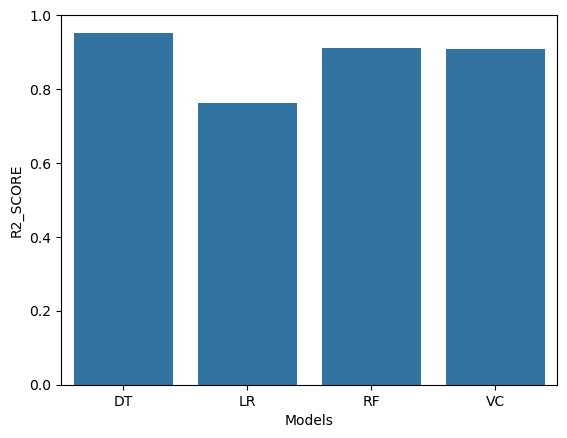

In [241]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)
plt.show()